<a href="https://colab.research.google.com/github/OoJackoO/MMAI894_Deep-Learning-Course-Project/blob/main/Week_2_Group_Project_MMAI_894_Gurashish_Juneja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accessing Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
#Importing all the libraries

import numpy as np
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import os, gc, time, pathlib
import tqdm, re, json
import imghdr

import random
seed = 24
tf.random.set_seed(seed)




In [ ]:
#Checking variables for train and valid

training_data = '/content/gdrive/MyDrive/Kaggle/train'
valid_data = "/content/gdrive/MyDrive/Kaggle/valid"

Step 1: Conduct Comprehensive Data Preprocessing

In [82]:
training_data = tf.keras.preprocessing.image_dataset_from_directory('/content/gdrive/MyDrive/Kaggle/train',
                                                           labels = "inferred",
                                                           batch_size = 32,
                                                           image_size = (224,224),
                                                           label_mode = "categorical",
                                                           color_mode = "rgb",
                                                           shuffle = True,
                                                           seed = seed,

                                                          )

Found 25857 files belonging to 11 classes.


In [84]:
val_test_data = keras.utils.image_dataset_from_directory(
    directory = valid_data,
    label_mode= "categorical",
    color_mode = "rgb",
    shuffle = True,
    seed = seed,
    validation_split = 0.5,
    subset = "both"
)

valid_data = val_test_data[0]
test_data = val_test_data[1]

Found 6684 files belonging to 11 classes.
Using 3342 files for training.
Using 3342 files for validation.


In [106]:
#Resizing the images to a consistent size

training_data = training_data.map(lambda x,y: (tf.image.resize(x,(224,224)),y))

In [107]:
#Normalizing pixel values of the images

training_data = training_data.map(lambda x,y: (x/255.0,y))

In [108]:
#Augmenting the data

training_data = training_data.map(lambda x, y: (tf.image.random_flip_left_right(x), y))

In [109]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

In [110]:


%matplotlib inline

def show_augemented_images(training_data, num_images = 5, num_augmentations = 5):

  plt.figure(figsize = (10,10))
  
  for images, _ in training_data.take(num_images):
    augmented_images = []
    for i in range(num_augmentations):
      augmented_images.append(data_augmentation(images))
    augmented_images = tf.concat(augmented_images, axis = 0)


    for j in range(num_images):
        plt.subplot(num_images, num_augmentations + 1, j*(num_augmentations + 1) + 1)
        plt.imshow(images[j].numpy().astype(np.uint8))
        plt.axis("off")
        for i in range(num_augmentations):
            plt.subplot(num_images, num_augmentations + 1, j*(num_augmentations + 1) + i + 2)
            plt.imshow(augmented_images[j*num_augmentations + i].numpy().astype(np.uint8))
            plt.axis("off")
    plt.show()



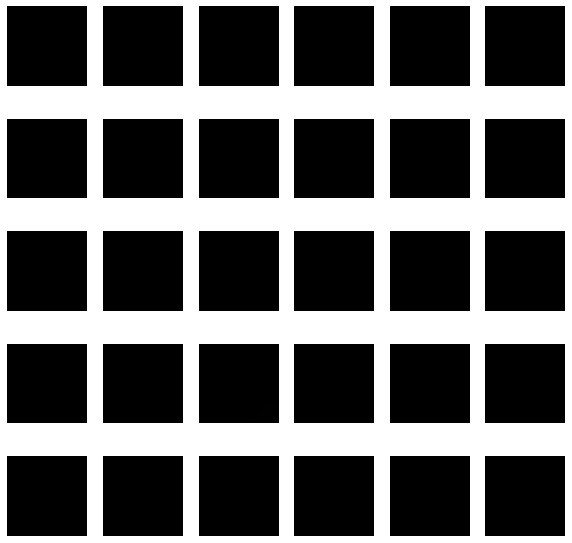

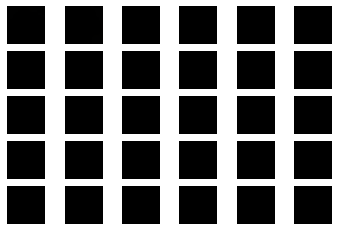

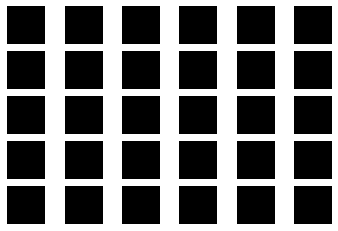

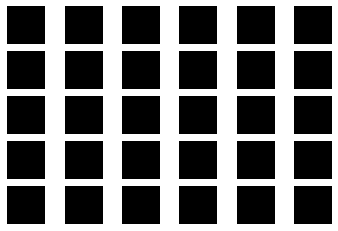

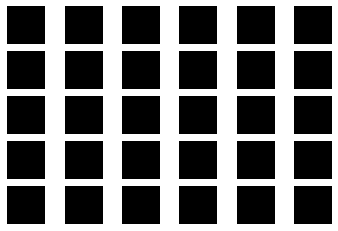

In [90]:
show_augemented_images(training_data, num_images = 5, num_augmentations= 5)

In [ ]:
#Note: Blank images. Not sure why.

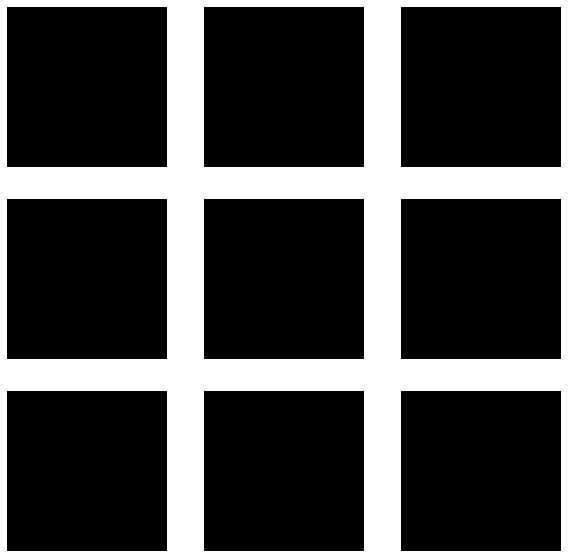

In [91]:
plt.figure(figsize = (10,10))
for images, _ in training_data.take(1):
  for i in range(9):
  
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")



In [ ]:
#Same issue. Not sure what went wrong here. 

Building a custom CNN Model

In [111]:
from keras.utils import to_categorical


In [112]:
#define the model architecture

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
])

print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 109, 109, 64)      9280      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 26, 26, 128)    

In [113]:
#Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [114]:
#Training the model

history = model.fit(data, epochs=10)

Epoch 1/10


ValueError: ignored